# BANK APP REVIEWS - DASHEN

In [226]:
#auto loading
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 🧱 1. Setup & Imports

In [227]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [228]:
warnings.filterwarnings("ignore")

In [229]:
# variable
BANK="Dashen"

In [230]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

### 📌 Project Overview

#### CBE APP Reviews


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [231]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/Dashen_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (449, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,6ece1f5e-55f2-404d-b980-1cb45823180f,Masersha,https://play-lh.googleusercontent.com/a/ACg8oc...,መቸሸጠ,5,0,1.0.16,2025-06-03 19:40:31,NaN,NaN
1,765ff69f-5274-45c5-985b-81b8d01e1874,Koki Mulugeta,https://play-lh.googleusercontent.com/a/ACg8oc...,wow,5,0,NaN,2025-06-03 17:30:11,NaN,NaN
2,7db66b6a-a044-43f1-a7ad-ea8a10815548,Badhasa Dassaalany,https://play-lh.googleusercontent.com/a/ACg8oc...,gadaa,5,0,1.0.16,2025-06-01 17:10:53,NaN,NaN
3,caf4a80c-85db-4b49-ab9c-a0b55e152317,Nebiyu Getachew Mamo,https://play-lh.googleusercontent.com/a-/ALV-U...,Massive upgrade from the Amole app.,5,0,1.0.16,2025-05-31 23:04:04,NaN,NaN
4,2c5df026-16eb-4d6b-a044-acf4103d1c36,Mudin said,https://play-lh.googleusercontent.com/a-/ALV-U...,good,4,0,1.0.16,2025-05-31 22:39:35,NaN,NaN


### Dataset Overview

In [232]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
19,115f7455-45c0-483c-b690-0e83dada584b,Limited Access,https://play-lh.googleusercontent.com/a/ACg8oc...,useless app ever loading take long,1,0,NaN,2025-05-27 09:19:32,NaN,NaN
77,185c1487-6efe-4ba5-bbaf-41ea48da9422,Beyene,https://play-lh.googleusercontent.com/a/ACg8oc...,It is very fast and secured mobile banking app...,5,1,1.0.15,2025-04-29 15:27:54,NaN,NaN
257,001296eb-c4b1-481a-acbd-efdb9eda67a5,Mikiyas Tilahun,https://play-lh.googleusercontent.com/a/ACg8oc...,best,5,3,1.0.14,2025-04-06 08:51:01,NaN,NaN
32,7f8c28d9-8bd2-4bf5-b220-b520301c24c3,Olana Degefa,https://play-lh.googleusercontent.com/a/ACg8oc...,its best,5,0,NaN,2025-05-19 09:00:24,NaN,NaN
379,9b75d0d7-9840-4c6c-bf0f-5d0816e7644c,Yared Tesfaye,https://play-lh.googleusercontent.com/a/ACg8oc...,This app is literally the best thing ever The ...,5,12,1.0.4,2025-01-23 18:13:50,NaN,NaN
158,d41af5b1-8acf-4f66-9d54-e14316bf489d,Tekletsadik A Tesfa,https://play-lh.googleusercontent.com/a-/ALV-U...,"Dashen Bank Super App is fast, reliable, and s...",5,2,NaN,2025-04-21 15:16:09,NaN,NaN
444,650ad650-9821-4bda-a43f-88fec69ab680,Geresu Ku,https://play-lh.googleusercontent.com/a-/ALV-U...,Best,5,5,NaN,2025-01-13 21:11:58,NaN,NaN
185,22725963-a873-43c8-a711-f52ec4ce55b2,DANIEL FELEKE,https://play-lh.googleusercontent.com/a/ACg8oc...,After i download the app recently had a smooth...,5,6,1.0.14,2025-04-21 13:07:27,NaN,NaN
212,63f87ad6-81fd-41ce-ac38-3fa11b0db062,Mamaru Worku,https://play-lh.googleusercontent.com/a/ACg8oc...,best mobile banking application,5,2,1.0.14,2025-04-21 11:28:45,NaN,NaN
8,40c6e51b-c1bb-4bb0-af7c-89a43ffbdc90,Sayid Qofee,https://play-lh.googleusercontent.com/a/ACg8oc...,Wow,5,0,NaN,2025-05-30 11:16:47,NaN,NaN


In [233]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
444,650ad650-9821-4bda-a43f-88fec69ab680,Geresu Ku,https://play-lh.googleusercontent.com/a-/ALV-U...,Best,5,5,NaN,2025-01-13 21:11:58,NaN,NaN
445,cad7278a-410d-4eed-805d-d1a942009cc3,TSEGAW WORKIE,https://play-lh.googleusercontent.com/a/ACg8oc...,"Waw Great and innovated,user friendly, always ...",5,27,1.0.1,2025-01-13 21:01:12,NaN,NaN
446,b92aaec0-99b9-49ac-ae55-03c04a52aec5,Kemal Keyire,https://play-lh.googleusercontent.com/a-/ALV-U...,It's Best waww 🙏,5,15,1.0.1,2025-01-13 09:37:19,NaN,NaN
447,7ed6c112-916c-44c2-b0ae-af2ff9d8c58f,Anwarf ahmed,https://play-lh.googleusercontent.com/a/ACg8oc...,Always one step ahead,5,22,1.0.1,2025-01-13 09:15:03,NaN,NaN
448,60f2b9c0-9fc9-49d9-97c8-7c1f9aca05fe,Abdulmejid Abdela,https://play-lh.googleusercontent.com/a-/ALV-U...,"Like Me, I Hope It Works Better Than Before.",5,18,1.0.0,2025-01-11 11:36:49,NaN,NaN


In [234]:
#shape of the dataset
df.shape

(449, 10)

In [235]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [236]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,449.0,4.478842,1.199003,1.0,5.0,5.0,5.0,5.0
thumbsUpCount,449.0,7.073497,23.428109,0.0,2.0,2.0,4.0,226.0
replyContent,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
repliedAt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,449,449,6ece1f5e-55f2-404d-b980-1cb45823180f,1
userName,449,449,Masersha,1
userImage,449,449,https://play-lh.googleusercontent.com/a/ACg8oc...,1
content,449,408,good,11
reviewCreatedVersion,358,11,1.0.14,100
at,449,449,2025-06-03 19:40:31,1


In [238]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              449 non-null    object 
 1   userName              449 non-null    object 
 2   userImage             449 non-null    object 
 3   content               449 non-null    object 
 4   score                 449 non-null    int64  
 5   thumbsUpCount         449 non-null    int64  
 6   reviewCreatedVersion  358 non-null    object 
 7   at                    449 non-null    object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
dtypes: float64(2), int64(2), object(6)
memory usage: 35.2+ KB


In [239]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                449
userName                449
userImage               449
at                      449
content                 408
thumbsUpCount            37
reviewCreatedVersion     11
score                     5
replyContent              0
repliedAt                 0
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [240]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [241]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
replyContent,449,100.00%
repliedAt,449,100.00%
reviewCreatedVersion,91,20.27%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
content,0,0.00%
score,0,0.00%
thumbsUpCount,0,0.00%
at,0,0.00%


### Missing Values

In [242]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,449,100.00%
repliedAt,449,100.00%
reviewCreatedVersion,91,20.27%


### Duplicates

In [243]:
#count duplicates
dq.count_duplicates()

0

In [244]:
#look at the duplicates
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


### Invalid Values

In [245]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [246]:
#saving the original dataset for later use
df_original=df.copy()

In [247]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 0 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
32,7f8c28d9-8bd2-4bf5-b220-b520301c24c3,Olana Degefa,https://play-lh.googleusercontent.com/a/ACg8oc...,its best,5,0,NaN,2025-05-19 09:00:24,NaN,NaN
143,62ff3224-447a-4021-9b69-69faade17181,firaol Gosa,https://play-lh.googleusercontent.com/a-/ALV-U...,one of the best digital platforms I’ve used! F...,5,4,1.0.14,2025-04-21 17:40:32,NaN,NaN
25,e2c02e65-3be7-46e0-9cbc-7d4295bee6f7,Birhanu tasfawu,https://play-lh.googleusercontent.com/a-/ALV-U...,very Nice,5,0,NaN,2025-05-23 12:09:24,NaN,NaN
368,d2f0062a-2be2-4fac-81d9-f9dd2a8f9a27,metania engida,https://play-lh.googleusercontent.com/a-/ALV-U...,Dashen bank super app for easy life.,5,4,1.0.4,2025-01-30 20:10:28,NaN,NaN
146,7ec853c5-737f-4ffe-b35b-069674bb88a8,Zerihun Tegenu,https://play-lh.googleusercontent.com/a-/ALV-U...,This is what we call banking app. As professio...,5,5,1.0.15,2025-04-21 17:13:56,NaN,NaN


In [248]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [249]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
392,80794c1d-2e9b-4fdf-88e6-c4bee65e5f94,Zeda Smart,https://play-lh.googleusercontent.com/a-/ALV-U...,I hope it will be better than amole,5,3,1.0.4,2025-01-18 13:03:55,NaN,NaN
408,1816cec4-cc37-48de-b94b-4f0d252f2eaa,Amare Wa,https://play-lh.googleusercontent.com/a/ACg8oc...,Wow,5,2,1.0.1,2025-01-16 08:51:15,NaN,NaN
352,ede1dfcb-1c62-403f-8d8c-0cebc9f600ca,Temesgen Yirdaw,https://play-lh.googleusercontent.com/a-/ALV-U...,On Transaction page only show sent Transaction...,4,1,1.0.7,2025-02-06 13:25:50,NaN,NaN
89,f0c1bd73-66ab-47e9-9238-2ab86618c796,Muluken Nega,https://play-lh.googleusercontent.com/a-/ALV-U...,It is one of the best app ever use it and do it,5,1,1.0.15,2025-04-26 11:22:42,NaN,NaN
66,f4d24779-931e-4cfd-a622-92dfcb654d3d,Abraham Kal,https://play-lh.googleusercontent.com/a/ACg8oc...,it seems me logging out within minutes,1,1,1.0.16,2025-05-03 09:43:29,NaN,NaN


In [250]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] Dropping 2 empty column(s): ['replyContent', 'repliedAt']


In [251]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion']


In [252]:
dq.find_invalid_values()

{}

In [253]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [254]:
df=await dq.translate_non_english_text("content")

INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=it&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=nice+application "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=good "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=pl&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=wow "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET https://translate.googleapis.com/translate_a/single?client=gtx&sl=so&tl=en&hl=en&dt=at&dt=bd&dt=ex&dt=ld&dt=md&dt=qca&dt=rw&dt=rm&dt=ss&dt=t&ie=UTF-8&oe=UTF-8&otf=1&ssel=0&tsel=0&tk=xxxx&q=gadaa "HTTP/2 200 OK"
INFO:httpx:HTTP Request: GET htt

In [255]:
df.shape

(449, 5)

### Inconsistencies and Inaccuracies

In [256]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [257]:
df=dq.convert_columns_to_datetime()

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       449 non-null    object
 1   content        449 non-null    object
 2   score          449 non-null    int64 
 3   thumbsUpCount  449 non-null    int64 
 4   at             449 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.7+ KB


In [259]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [260]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [261]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [262]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
424,Always one step a head!,5,2025-01-15 10:26:27,Tsegaye Kelbesa,4,Dashen,Google Store
244,The app is very backward and doesn't always wo...,1,2025-04-14 11:32:53,Jara Regassa,5,Dashen,Google Store
282,Best Experiences,5,2025-03-26 11:14:01,አንተነህ ብቻ,2,Dashen,Google Store
349,"I tried the new Dash Bank Super App today, and...",5,2025-02-06 20:21:48,Habtamu Tamrat,7,Dashen,Google Store
159,Db sup app is A platform or an application tha...,5,2025-04-21 15:13:09,Edilu Bekele,6,Dashen,Google Store
81,Best app,5,2025-04-28 12:15:07,biruk wedajo.32,1,Dashen,Google Store
347,It doesnn't work,1,2025-02-07 15:51:08,Red Wan,1,Dashen,Google Store
109,"#dashen super app is easy to use, secure & fas...",5,2025-04-22 13:44:44,seble Mesfin,2,Dashen,Google Store
438,All in One,5,2025-01-14 19:49:24,HENOK DEGEFU,5,Dashen,Google Store
352,On Transaction page only show sent Transaction...,4,2025-02-06 13:25:50,Temesgen Yirdaw,1,Dashen,Google Store


## 6. Analyze & Visualize

In [263]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


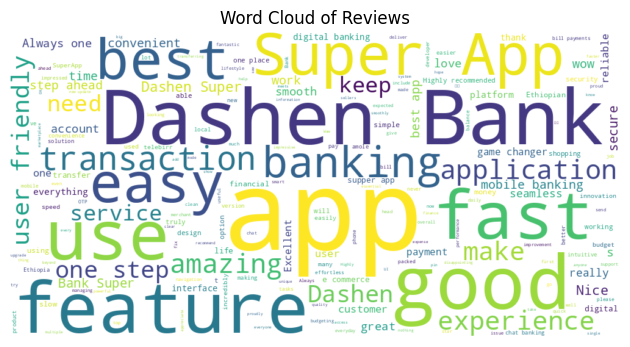

In [264]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


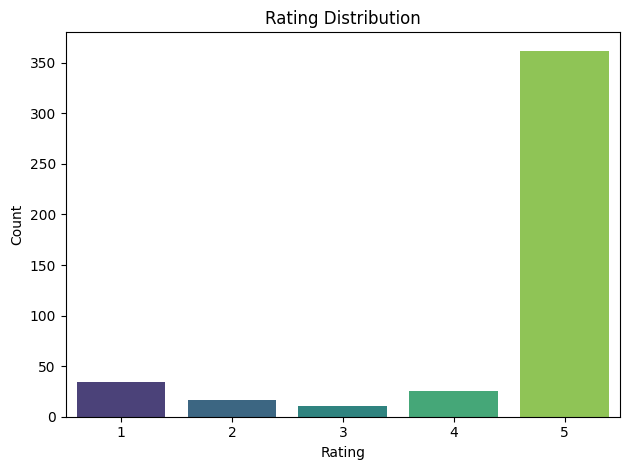

In [265]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


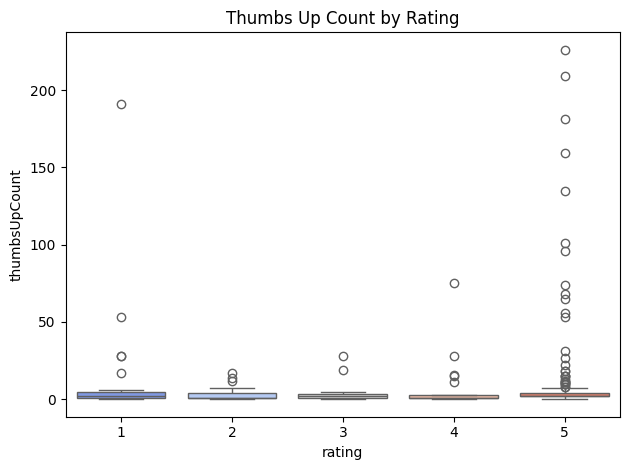

In [266]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


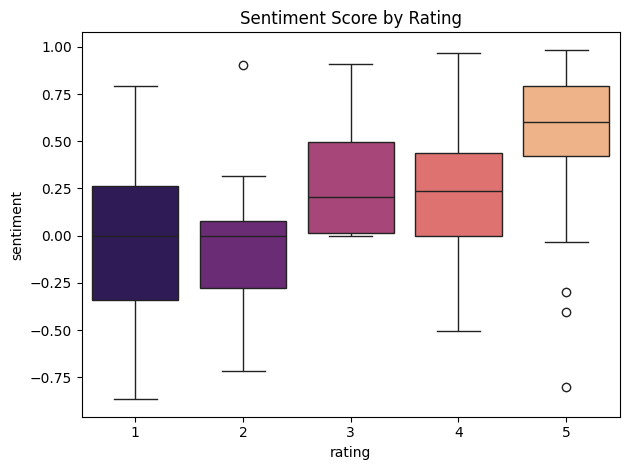

In [267]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [268]:
df=dq.drop_columns(['userName','thumbsUpCount'])

[INFO] Dropped columns: ['userName', 'thumbsUpCount']


### Export Cleaned Data

In [269]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

In [270]:
df.sample(15)

,review,rating,date,bank,source
11,it too slow,3,2025-05-29 13:26:30,Dashen,Google Store
401,Excellent and user friendly App. Excellence is...,5,2025-01-16 19:10:53,Dashen,Google Store
306,It good and easy to use,5,2025-03-11 10:08:03,Dashen,Google Store
415,It's great! But it will be advanced if you inc...,4,2025-01-15 18:49:41,Dashen,Google Store
311,Wow Excellent app,5,2025-03-08 12:43:31,Dashen,Google Store
155,The Dashen supperapp is a revolutionary advanc...,5,2025-04-21 15:40:34,Dashen,Google Store
218,Dashen Super App gives me an amazing convenien...,5,2025-04-21 11:24:04,Dashen,Google Store
353,Wonderful Application love,5,2025-02-05 19:02:00,Dashen,Google Store
307,በጣም አሪፍ መተግበሪያ ነው ። አመሠግናለሁ ።,5,2025-03-10 17:38:29,Dashen,Google Store
268,heros,5,2025-04-02 15:03:47,Dashen,Google Store
